# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [18]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [19]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return x*x*numpy.sin(x)

Ensure your function works with numpy arrays:

In [20]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [21]:
def g(x):
    '''Analytical integral of f(x).'''
    return 2*x*numpy.sin(x) + (2-x*x)*numpy.cos(x) - 2

Check your solution with the same numpy array:

In [22]:
assert g(0) == 0.

In [23]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [24]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax) - g(xmin)

Check your analytic function:

In [25]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [26]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    dx = (xmax-xmin)/N
    f0 = f(xmin)
    fN = f(xmax)
    
    mpoints = 0
    xpoints = 0
    
    for i in range(0,N):
        mpoints = mpoints + 4*f(xmin + i*dx + 0.5*dx)
    for i in range(0,N-1):
        xpoints = xpoints + 2*f(xmin + (i+1)*dx)
    return dx/6 * (f0 + fN + mpoints + xpoints)

Make sure you have implemented Simpson's rule correctly:

In [27]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [28]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0,0.5,'Base 10 log of the fractional error')

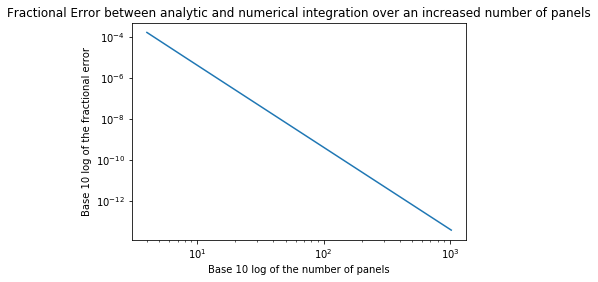

In [31]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

def result_numeric(x0,x1,h):
    result = []
    for i in h:
        result.append(integrate_numeric(x0,x1,i))
    return result

fractional_error = 1 - ((result_numeric(x0,x1,panel_counts))/(result_analytic))

plt.loglog(panel_counts,fractional_error)
plt.title("Fractional Error between analytic and numerical integration over an increased number of panels")
plt.xlabel("Base 10 log of the number of panels")
plt.ylabel("Base 10 log of the fractional error")

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The greater the number of panels the more accurately the set of panels defines the integral of the function. With the Simpson's rule, the error in the numerical integral falls as a function of $1/N^4$. Having fewer panels means that, since the area of the panels used does not match up with the definite integral of the function, there will be an over or underestimation of the area. Increasing the number of panels increases the accuracy of the numerical integration. This is because the functions within the intervals are smaller and are hence much easier to approximate with numerical integration rules. Since the Riemann definition of integration is the sum of panels under a function with the number of panels tending to infinity and hence the width of a panel tending to 0, having the number of panels too large simply defines the exact integral.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

With the trapezium rule, increased panel count would again increase the accuracy of the numerical integral; in this case the error decreases with panel count by $1/N^2$. This is because the trapezium rule approximates the curve to be a linear function within the panel. Any function in general can be defined as an infinite number of straight lines of infinitessimal length in different directions. Having thinner panels and hence a greater panel count allows for the function to be described using more straight lines which better defines the function. As a result of this, more panels increases the accuracy of the trapezium rule.